### This notebook aims at testing bbc.  

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
import pylab as pl
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [2]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/*6h*_ptrc_T*.nc'));
print("found *.nc file: \n{}".format(nc_filename));

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry']

import matplotlib.cm as cm
def vetical(data,dep,string,ylim='False',yup=-1000,ydown=500,a1=700,a2=190):
    a=[[],[],[a1],[a2]]#a=np.where(data==data.max())
    
    for i in range (len(data[:,1,1,1])):
        cc=cm.Spectral(i*50)
        plt.plot(data[-i,:,a[2][0],a[3][0]],dep,color=cc,linewidth=1,label='T:%s'%i)
        plt.legend(loc=2)

    for k in range (len(dep)):
        plt.axhline(dep[k],c="grey",linestyle='--',linewidth=0.5,alpha=0.5)
    plt.axhline(bathy[a[2][0],a[3][0]],c="grey",linewidth=5,alpha=0.7)
    plt.ylabel('depth (m)')
    plt.xlabel('%s Conc.'%string)
    
    if ylim=='True':
        dmin=bathy[a[2][0],a[3][0]]+yup
        dmax=bathy[a[2][0],a[3][0]]+ydown
    plt.ylim([dmin,dmax])
              
    #print ('deepest:%s m'%bathy[a[2][0],a[3][0]])

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/ANHA_BBC_6h_20020101_20020101_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/en_6h_20020101_20020101_ptrc_T.nc']


#### The lines I added in trcsms_my_trc.F90


```python

        DO jj = 1, jpj
             DO ji = 1, jpi
                ibot   = mbkt(ji,jj)       ! bottom level of t-point
                ibotm1 = mbkt(ji,jj) -1    ! Just above last level      

               ! Bottom level no flux condition for diss. elements:
                trn(ji,jj,ibot,jpmyt1)=tmask(ji,jj,ibot)*trn(ji,jj,ibotm1,jpmyt1)!ibot/ibotm1
                trn(ji,jj,ibot,jpmyt2)=tmask(ji,jj,ibot)*trn(ji,jj,ibotm1,jpmyt2)

             END DO
        END DO


        DO jj = 1, jpj
             DO ji = 1, jpi
                ibot   = mbkt(ji,jj) +0      
                ibotm1 = mbkt(ji,jj) -1             
                ibotm2 = mbkt(ji,jj) -2     !the 2nd layer above last level

                ! Bottom level  Neumman condition for part. elements:

                trn(ji,jj,ibot,jpmyt3)=trn(ji,jj,ibotm1,jpmyt3)+&
                                       (trn(ji,jj,ibotm1,jpmyt3)-trn(ji,jj,ibotm2,jpmyt3))&
                                       *fse3t(ji,jj,ibotm2)/fse3t(ji,jj,ibotm1)


                trn(ji,jj,ibot,jpmyt4)=trn(ji,jj,ibotm1,jpmyt4)+&
                                       (trn(ji,jj,ibotm1,jpmyt4)-trn(ji,jj,ibotm2,jpmyt4))&
                                       *fse3t(ji,jj,ibotm2)/fse3t(ji,jj,ibotm1)
             END DO
        END DO


```

* Figures belows tested these lines.

* Originally, the index is like:


```python

                ibot   = mbkt(ji,jj) +1      
                ibotm1 = mbkt(ji,jj)              
                ibotm2 = mbkt(ji,jj) -1    

```



* However, this is wrong. The index below is correct. In this notebook, the bbcs are in trcnxt now. It seems that  big problem still happened at the bot if the index is:

```python


                ibot   = mbkt(ji,jj) +0      
                ibotm1 = mbkt(ji,jj) -1             
                ibotm2 = mbkt(ji,jj) -2    


```


ps. Definition of mbkt     --------------->     mbkt(:,:) = MAX( mbathy(:,:) , 1 )

#### plot vertical profiles for tracers at point [700,190]

In [3]:
ptrc=nc.Dataset(nc_filename[0])
print("found *.nc file: \n{}".format(nc_filename[0]))
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

found *.nc file: 
/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/ANHA_BBC_6h_20020101_20020101_ptrc_T.nc


In [4]:
print TR_7.max()
print TR_8.max()
print TR_9.max()
print TR_10.max()

0.438806
0.946575
423.018
1295.05


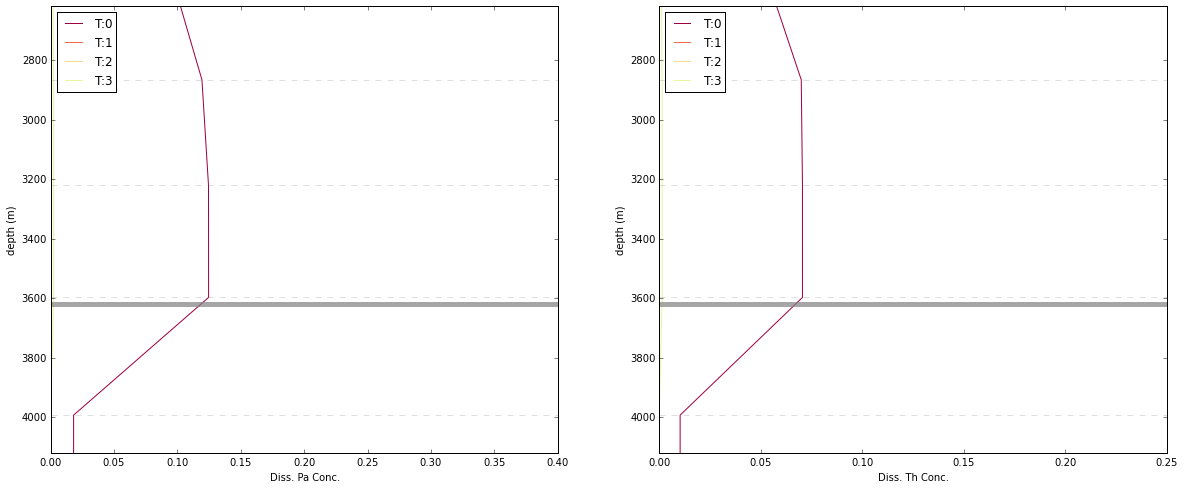

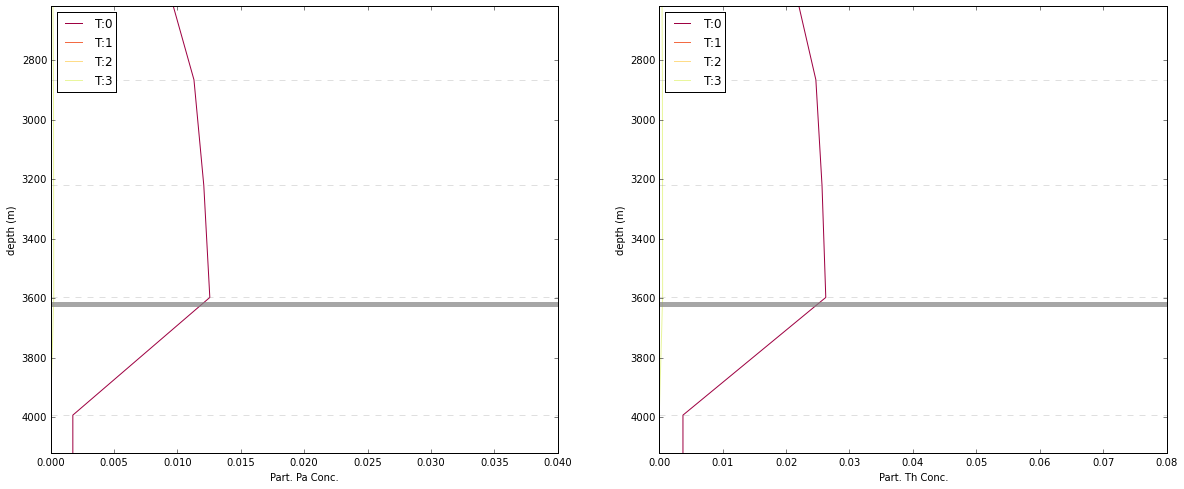

In [5]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True')
plt.gca().invert_yaxis() 
plt.subplot(122)
vetical(TR_8,dep,'Diss. Th','True')
plt.gca().invert_yaxis()

fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_9,dep,'Part. Pa','True')
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_10,dep,'Part. Th','True')
plt.gca().invert_yaxis()

plt.show()

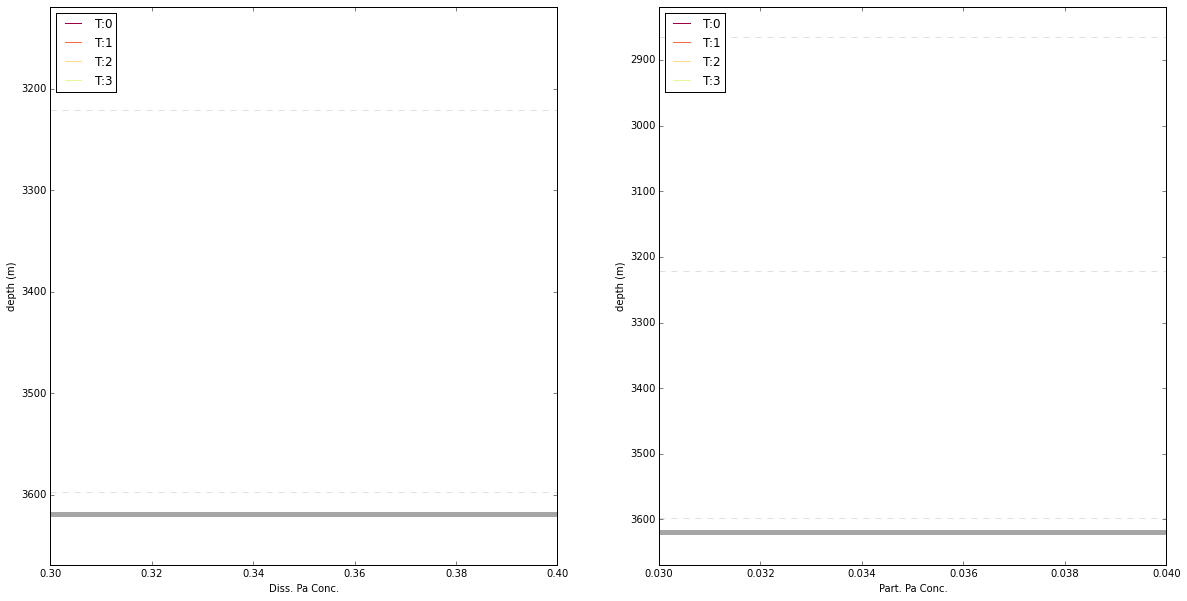

In [6]:
#zoom in
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True',yup=-500,ydown=50)
plt.gca().invert_yaxis();plt.xlim([0.3,0.4])

plt.subplot(122)
vetical(TR_9,dep,'Part. Pa','True',yup=-800,ydown=50)
plt.gca().invert_yaxis();plt.xlim([0.03,0.04])
plt.show()

** The codes are doing the right things. However, If we plots the figure in top view, we will see discontinuity around the edges.**


### Plot horizontally
* diss. Pa

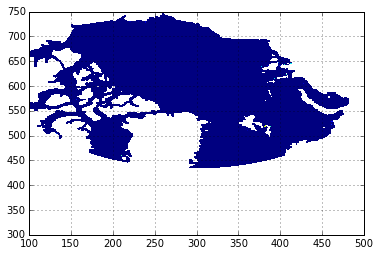

In [7]:
TR_7=np.ma.masked_where(TR_7<=0, TR_7)
plt.pcolor(TR_7[-1,20,:,:])
plt.grid();plt.xlim([100,500]);plt.ylim([300,750]);

* part. Th  (Something happens here!!!)

layer 20

(4, 50, 800, 544)


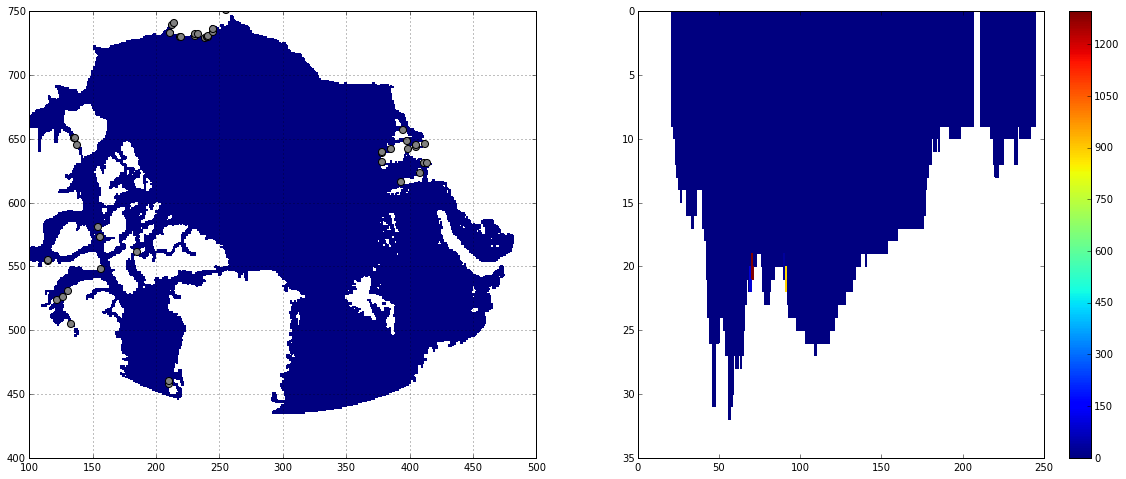

In [8]:
TR_10=np.ma.masked_where(TR_10<=0, TR_10)
print TR_10.shape
ii=[]
jj=[]
for i in range (len(TR_10[0,0,:,0])):
    for j in range (len(TR_10[0,0,0,:])):
        if TR_10[3,20,i,j]>1:
            ii.append(i)
            jj.append(j)
            #TR_10[-1,43,i,j]=np.ma.masked
fig=plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolor(TR_10[3,20,:,:],vmin=TR_10[3,0:35,730,150:400].min(),vmax=TR_10[3,0:35,730,150:400].max())
plt.scatter(jj,ii,s=50,c='grey')
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);

plt.subplot(122)
plt.pcolor(TR_10[3,0:35,730,150:400])
plt.colorbar()
plt.gca().invert_yaxis()

In [9]:
print ii

[458, 460, 505, 524, 526, 531, 548, 554, 555, 561, 573, 581, 616, 623, 631, 631, 632, 639, 640, 642, 642, 644, 645, 645, 646, 648, 651, 651, 657, 729, 730, 730, 730, 730, 731, 731, 732, 732, 733, 734, 736, 739, 741, 751, 753]


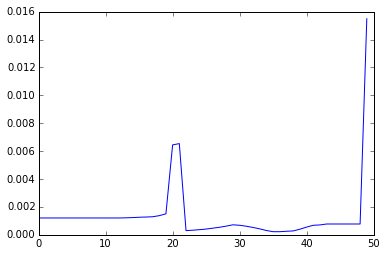

In [16]:
plt.plot(TR_9[0,:,ii[1],jj[1]])

* The value at the bottom is similar with the tendency at layer0. What happened to those places?

layer 21

(4, 50, 800, 544)


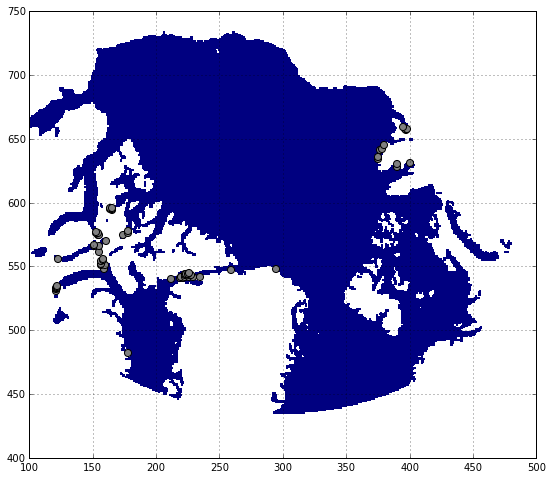

In [10]:
TR_10=np.ma.masked_where(TR_10<=0, TR_10)
print TR_10.shape
ii=[]
jj=[]
for i in range (len(TR_10[0,0,:,0])):
    for j in range (len(TR_10[0,0,0,:])):
        if TR_10[3,25,i,j]>1:
            ii.append(i)
            jj.append(j)
            #TR_10[-1,43,i,j]=np.ma.masked
fig=plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolor(TR_10[3,25,:,:],vmin=TR_10[3,0:35,730,150:400].min(),vmax=TR_10[3,0:35,730,150:400].max())
plt.scatter(jj,ii,s=50,c='grey')
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);

* Masked the place where part. Th >1 to take a look at the rest locations

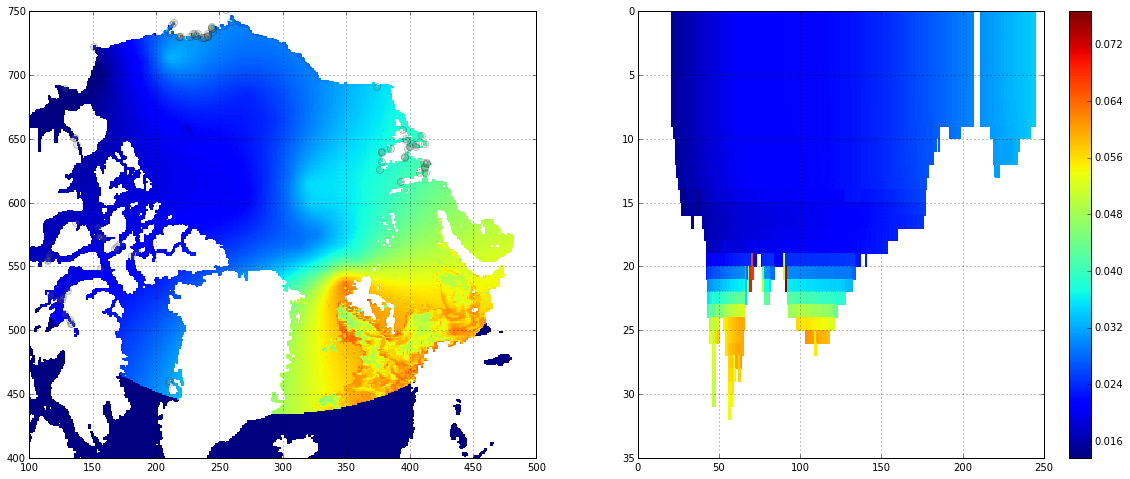

In [87]:
TR_100=np.ma.masked_where(TR_10>1,TR_10)
TR_100[0,:,:,:]=TR_100[0,:,:,:]*tmask[:,:,:]
TR_100=np.ma.masked_where(TR_100<=0,TR_100)
fig=plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolor(TR_100[0,20,:,:],vmin=TR_100[0,0:35,730,150:400].min(),vmax=TR_100[0,0:35,730,150:400].max())
plt.scatter(jj,ii,s=50,c='grey',alpha=0.2)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);

plt.subplot(122)
plt.pcolor(TR_100[0,0:35,730,150:400])
plt.colorbar()
plt.gca().invert_yaxis();plt.grid();

* Problems happen at particulate field first. So I am going to investigate the fse3t field.

In [69]:
mesh=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/mesh_mask.nc')
mbathy=mesh.variables['mbathy']
fse3t=mesh.variables['e3t'][:]
tmask=mesh.variables['tmask'][:]

In [77]:
data=np.empty(TR_10[0,0,:,:].shape)
for i in range (400,750):
    for j in range (100,500):
        ibot=mbathy[0,i,j]-1 #change a Fortran index to Python index
        data[i,j]=tmask[0,ibot-1,i,j]*fse3t[0,ibot,i,j]

lhs: plot delta z in the deepest cell for every grid points. The pattern dosen't have continuity at deep basin.

rhs: mask the place where fse3t>30m in order to focus on the shallow area. (It's not showing very useful information)

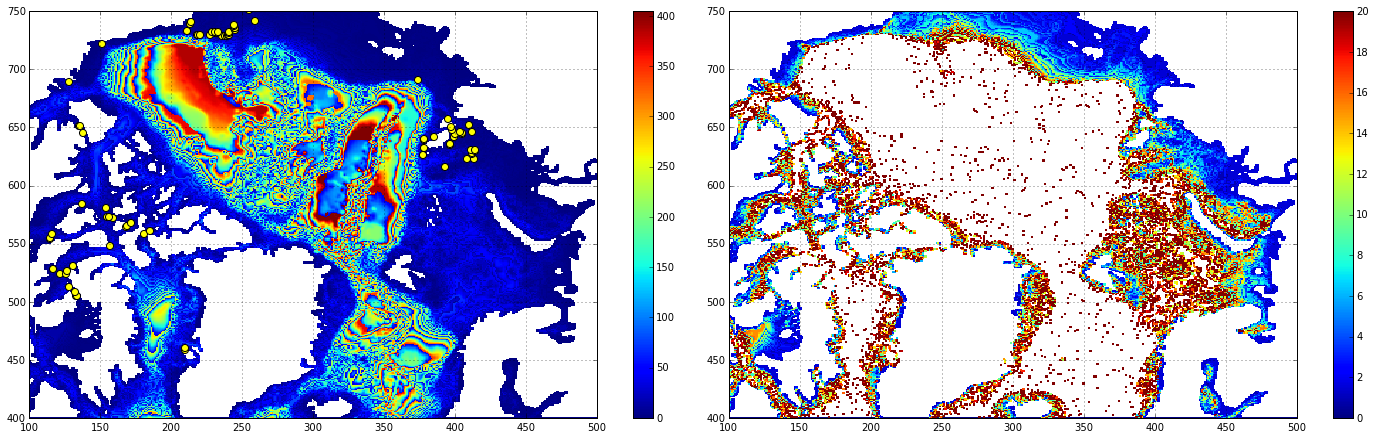

In [100]:
data=np.ma.masked_where(data==0,data)
fig=plt.figure(figsize=(20,6))
plt.subplot(121)
plt.pcolor(data[:,:])
plt.colorbar()
plt.scatter(jj,ii,s=50,c='yellow',alpha=1)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);

plt.subplot(122)
data2=np.ma.masked_where(data>30,data)
plt.pcolor(data2[:,:],vmin=0,vmax=20)
plt.colorbar()
#plt.scatter(jj,ii,s=50,c='yellow',alpha=0.2)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

take a look at fse3t at layer 20 and 21, where the huge values show up most frequently.  (Values at the edge is different from (much smaller than) the other places which should not be!!)

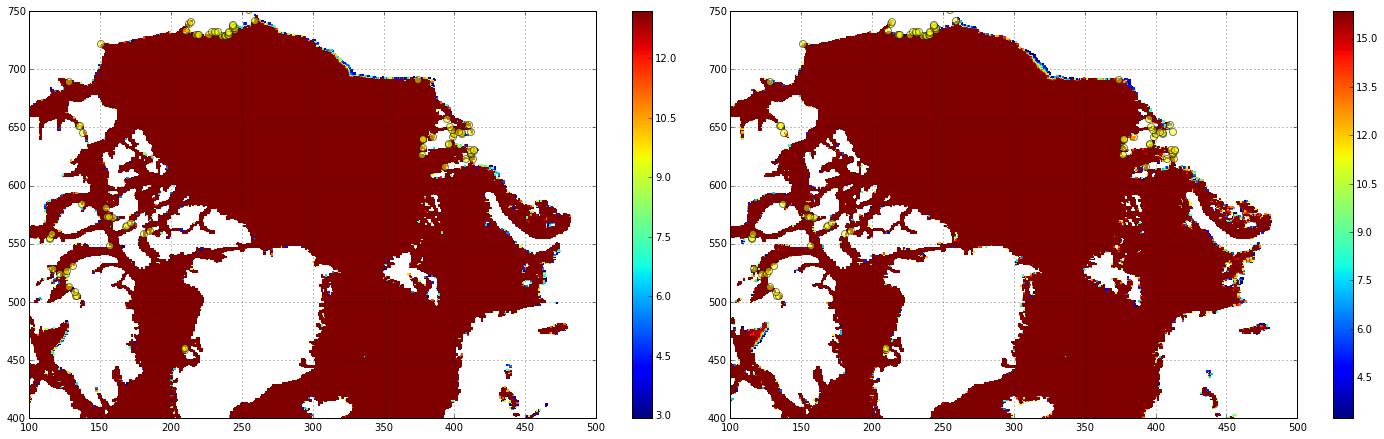

In [130]:
fig=plt.figure(figsize=(20,6))
plt.subplot(121)
e3t=fse3t[0,20,:,:]*tmask[0,20,:,:]
e3t=np.ma.masked_where(e3t==0,e3t)
plt.pcolor(e3t)
plt.colorbar()
plt.scatter(jj,ii,s=50,c='yellow',alpha=0.5)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);

plt.subplot(122)
e3t=fse3t[0,21,:,:]*tmask[0,21,:,:]
e3t=np.ma.masked_where(e3t==0,e3t)
plt.pcolor(e3t)
plt.colorbar()
plt.scatter(jj,ii,s=50,c='yellow',alpha=0.5)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Let's take a look at the ratio of fse3t[0,21,:,:]/fse3t[0,20,:,:]. This term is used at the bbc.

Found anomalies at the edge at the lhs plot and at the bottom at the rhs plot.

the ratio of fse3t[0,21,:,:]/fse3t[0,20,:,:] shoule be 1.19


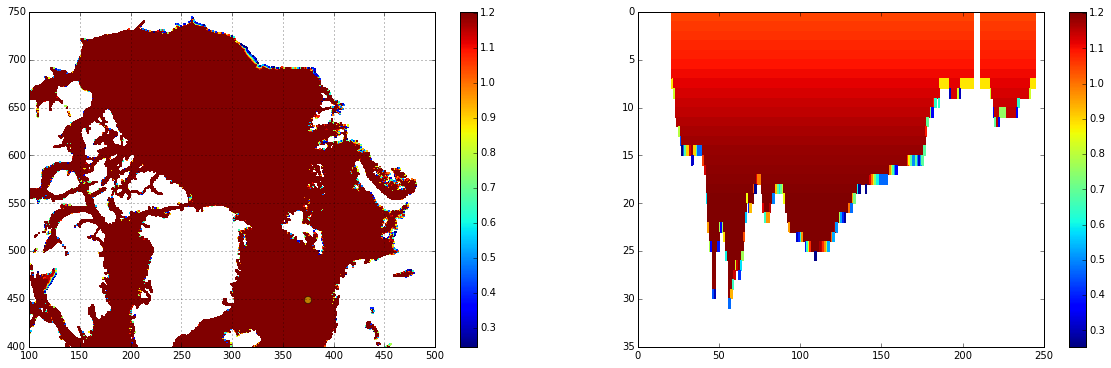

In [146]:
fig=plt.figure(figsize=(20,6))
re3t=fse3t[0,21,:,:]/fse3t[0,20,:,:]*tmask[0,21,:,:]
re3t=np.ma.masked_where(re3t==0,re3t)
plt.subplot(121)
plt.pcolor(re3t)
plt.colorbar()
plt.scatter(jj,ii,s=50,c='yellow',alpha=0.5)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);
print 'the ratio of fse3t[0,21,:,:]/fse3t[0,20,:,:] shoule be 1.19'

plt.subplot(122)
re3t=fse3t[0,1:35,730,150:400]/fse3t[0,0:34,730,150:400]*tmask[0,1:35,730,150:400]
re3t=np.ma.masked_where(re3t==0,re3t)
plt.pcolor(re3t)
plt.colorbar()
plt.gca().invert_yaxis()

I believe this is the problem. Now time to dig deep. Check the other layers. (Similar problem exists!)

(4, 50, 800, 544)


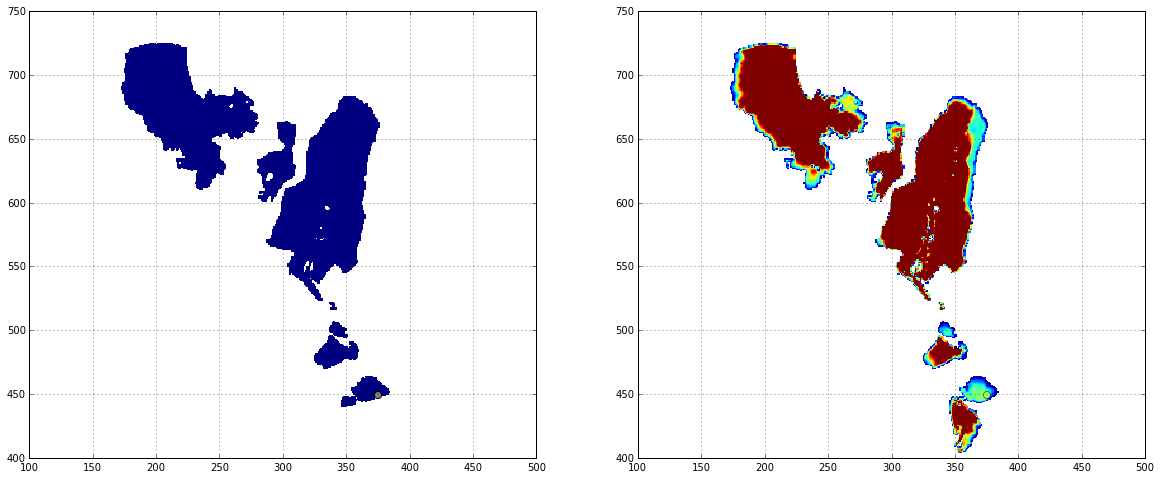

In [137]:
TR_10=np.ma.masked_where(TR_10<=0, TR_10)
print TR_10.shape
ii=[]
jj=[]
for i in range (len(TR_10[0,0,:,0])):
    for j in range (len(TR_10[0,0,0,:])):
        if TR_10[3,43,i,j]>1:
            ii.append(i)
            jj.append(j)
            #TR_10[-1,43,i,j]=np.ma.masked
fig=plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolor(TR_10[3,43,:,:],vmin=TR_10[3,0:35,730,150:400].min(),vmax=TR_10[3,0:35,730,150:400].max())
plt.scatter(jj,ii,s=50,c='grey')
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);

plt.subplot(122)
re3t=fse3t[0,43,:,:]/fse3t[0,42,:,:]*tmask[0,43,:,:]
re3t=np.ma.masked_where(re3t==0,re3t)
plt.pcolor(re3t)
#plt.colorbar()
plt.scatter(jj,ii,s=50,c='yellow',alpha=0.5)
plt.grid();plt.xlim([100,500]);plt.ylim([400,750]);


* Vertical analysis for specific point

In [10]:
a=np.where(TR_10==TR_10.max())
print a

(masked_array(data = [3],
             mask = False,
       fill_value = 999999)
, masked_array(data = [20],
             mask = False,
       fill_value = 999999)
, masked_array(data = [730],
             mask = False,
       fill_value = 999999)
, masked_array(data = [220],
             mask = False,
       fill_value = 999999)
)


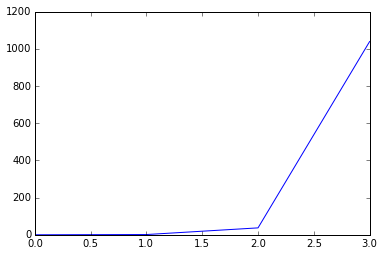

In [11]:
plt.plot(TR_10[:,20,730,220])

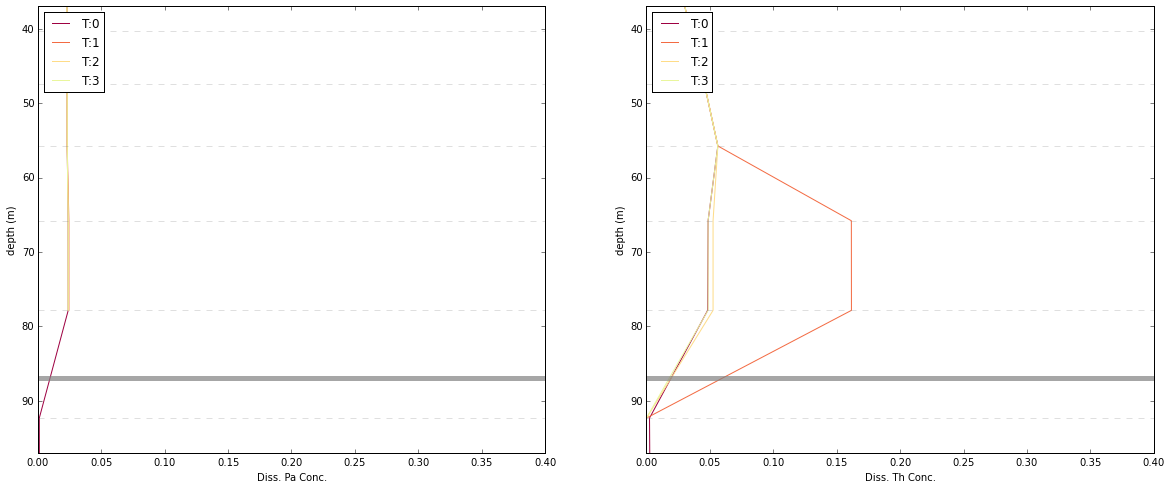

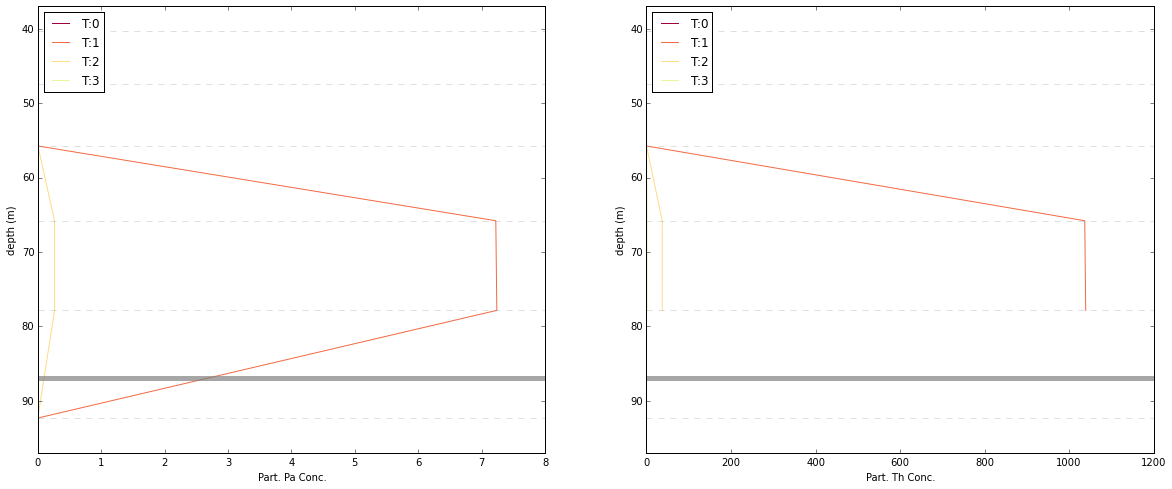

In [13]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True',yup=-50,ydown=10,a1=730,a2=220)
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_8,dep,'Diss. Th','True',yup=-50,ydown=10,a1=730,a2=220)
plt.gca().invert_yaxis()


fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_9,dep,'Part. Pa','True',yup=-50,ydown=10,a1=730,a2=220)
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_10,dep,'Part. Th','True',yup=-50,ydown=10,a1=730,a2=220)
plt.gca().invert_yaxis()

plt.show()

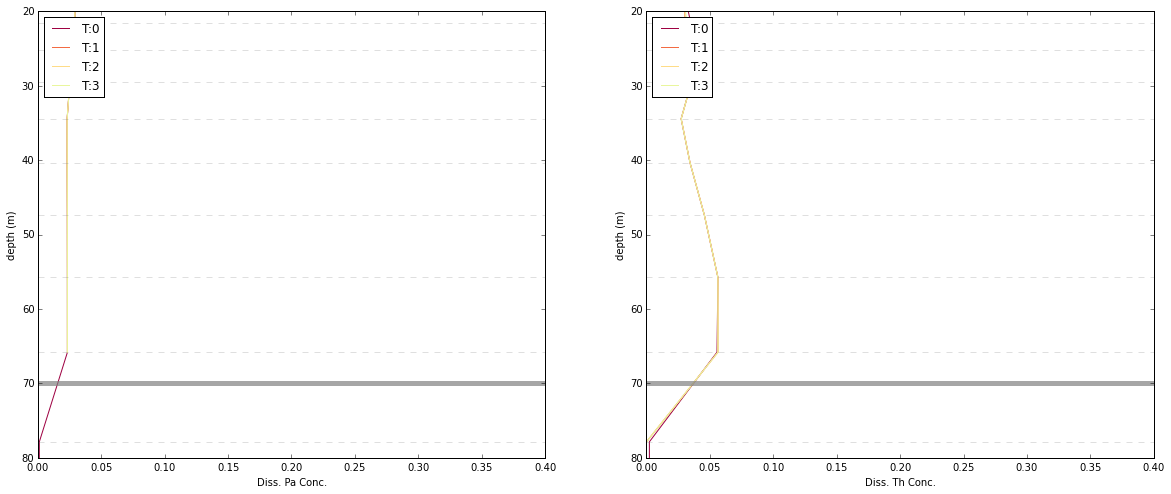

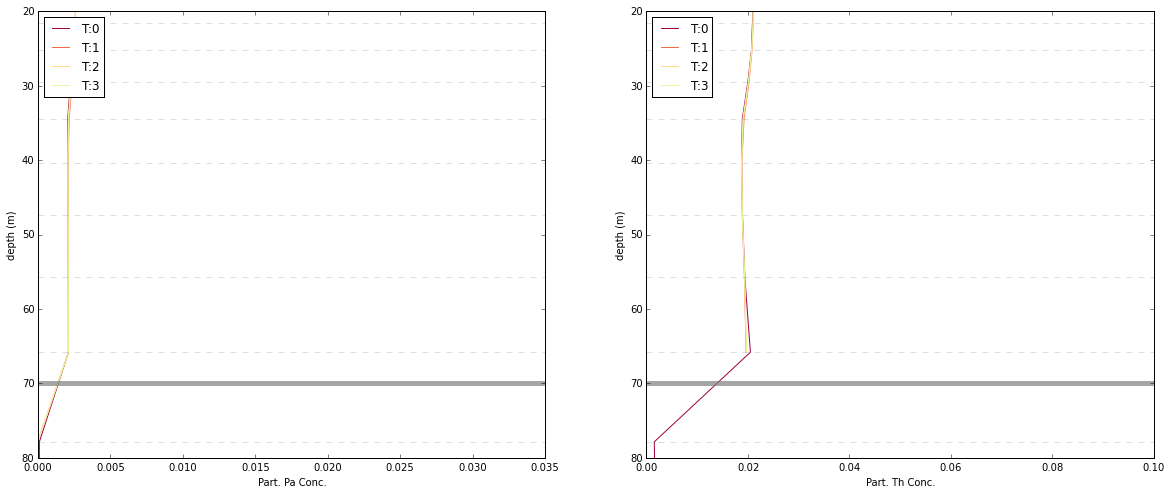

In [14]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True',yup=-50,ydown=10,a1=730,a2=221)
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_8,dep,'Diss. Th','True',yup=-50,ydown=10,a1=730,a2=221)
plt.gca().invert_yaxis()


fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_9,dep,'Part. Pa','True',yup=-50,ydown=10,a1=730,a2=221)
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_10,dep,'Part. Th','True',yup=-50,ydown=10,a1=730,a2=221)
plt.gca().invert_yaxis()

plt.show()

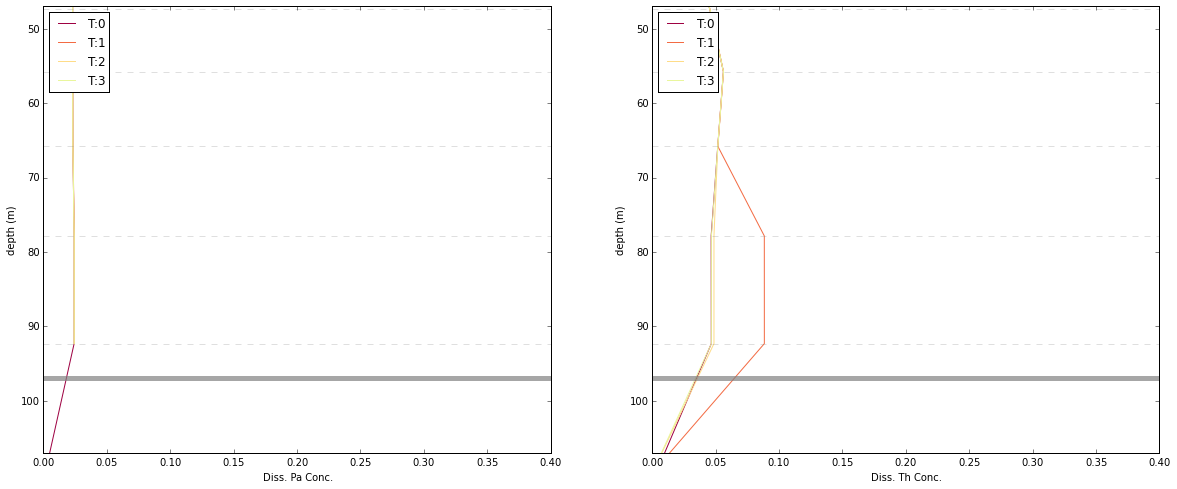

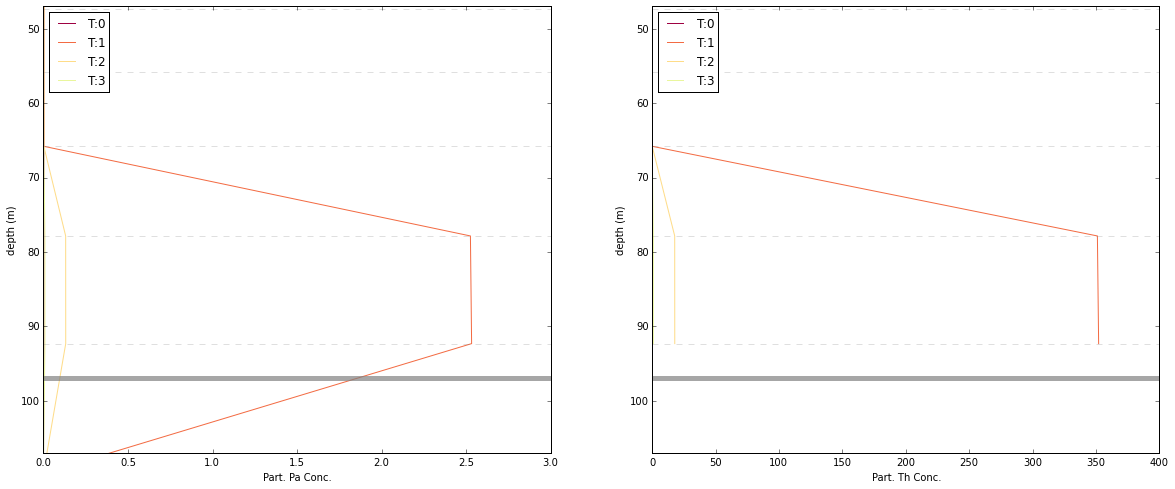

In [15]:
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True',yup=-50,ydown=10,a1=730,a2=219)
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_8,dep,'Diss. Th','True',yup=-50,ydown=10,a1=730,a2=219)
plt.gca().invert_yaxis()


fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_9,dep,'Part. Pa','True',yup=-50,ydown=10,a1=730,a2=219)
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_10,dep,'Part. Th','True',yup=-50,ydown=10,a1=730,a2=219)
plt.gca().invert_yaxis()

plt.show()